In [29]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

import statsmodels.api as sm
import numpy as np
from linearmodels import PanelOLS

data_path = '/Users/zhaomengshan/Desktop/Air_pollution/City_level_PM2.5/all_city_PM2.5.csv'
all_city_data = pd.read_csv(data_path)

gdp_control_simulated= pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_projected.csv')
gdp_control = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_clean.csv')
gdp_control_p = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_province.csv')
health_outcome= pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/health_outcomes.csv')
all_city_data.head()

,NAME_1,NAME_2,pm25_avg,SO4_avg,NO3_avg,NH4_avg,OM_avg,BC_avg,date
0,Anhui,Anqing,63.659722,13.348819,14.954444,12.089444,15.278889,3.121875,2019-03-19
1,Anhui,Bengbu,74.327273,12.884545,20.600727,12.765636,17.659455,2.922182,2019-03-19
2,Anhui,Bozhou,69.152941,12.704588,19.725529,12.628588,14.858353,3.089412,2019-03-19
3,Anhui,Chaohu,60.528090,11.137191,16.422809,10.633258,12.130787,2.299888,2019-03-19
4,Anhui,Chizhou,45.658537,10.233415,7.891463,7.069146,13.916829,2.777195,2019-03-19


In [30]:
health_outcome

,Time,City_Name,gdp_health_y,gdp_health_m,City_EN,Province_EN,Year_lastm,Month_lastm
0,2022年7月,成都,99.5,100.0,Chengdu,Sichuan,2022,7
1,2022年6月,成都,99.5,99.8,Chengdu,Sichuan,2022,6
2,2022年5月,成都,99.6,100.0,Chengdu,Sichuan,2022,5
3,2022年4月,成都,99.6,100.1,Chengdu,Sichuan,2022,4
4,2022年3月,成都,99.5,100.2,Chengdu,Sichuan,2022,3
...,...,...,...,...,...,...,...,...
8779,2002年7月,西宁,100.3,99.9,Xining,Qinghai,2002,7
8780,2002年6月,西宁,100.5,100.3,Xining,Qinghai,2002,6
8781,2002年5月,西宁,100.0,101.7,Xining,Qinghai,2002,5
8782,2002年4月,西宁,98.2,100.3,Xining,Qinghai,2002,4


In [31]:
mean_pm25 = health_outcome['gdp_health_m'].mean()
sd_pm25 = health_outcome['gdp_health_m'].std()
min_pm25 = health_outcome['gdp_health_m'].min()
max_pm25 = health_outcome['gdp_health_m'].max()

print(f"Mean: {mean_pm25}")
print(f"Standard Deviation: {sd_pm25}")
print(f"Minimum: {min_pm25}")
print(f"Maximum: {max_pm25}")

Mean: 100.15727459016394
Standard Deviation: 0.9718686394576234
Minimum: 91.3
Maximum: 121.8


In [32]:
gdp_control = pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/gdp_control_clean.csv')
gdp_control.head()

,城市,年份,省份,gdp(100million),gdp_percapita,second_share,gov_exp,tech_exp,educ_exp,gov_share,tech_share,educ_share,City_EN,Province_EN,population_all
0,南充市,2017,四川省,669.2215,64217.62,NaN,1865753.0,10006.0,281576.0,0.278795,0.001495,0.042075,Nanchong,Sichuan,737.0
1,南充市,2021,四川省,952.0000,49308.00,39.16,2018147.0,15435.0,365775.0,0.211990,0.001621,0.038422,Nanchong,Sichuan,NaN
2,南充市,2020,四川省,884.0000,45595.00,37.94,2352274.0,10033.0,368273.0,0.266094,0.001135,0.041660,Nanchong,Sichuan,NaN
3,南充市,2019,四川省,847.0000,43267.00,40.38,2353888.0,14121.0,354521.0,0.277909,0.001667,0.041856,Nanchong,Sichuan,726.0
4,南充市,2018,四川省,740.4234,37908.00,41.08,2109258.0,14436.0,304523.0,0.284872,0.001950,0.041128,Nanchong,Sichuan,728.0


In [33]:
variables = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

# Initialize a dictionary to store the statistics
stats = {}

# Calculate statistics for each variable
for variable in variables:
    stats[variable] = {
        'mean': gdp_control[variable].mean(),
        'sd': gdp_control[variable].std(),
        'min': gdp_control[variable].min(),
        'max': gdp_control[variable].max()
    }

# Display the results
for variable, values in stats.items():
    print(f"{variable}:")
    print(f"  Mean: {values['mean']}")
    print(f"  Standard Deviation: {values['sd']}")
    print(f"  Minimum: {values['min']}")
    print(f"  Maximum: {values['max']}\n")

gdp_percapita:
  Mean: 49702.778993493404
  Standard Deviation: 38044.0069021138
  Minimum: 0.0
  Maximum: 467749.0

second_share:
  Mean: 46.24896020959555
  Standard Deviation: 11.434470529718897
  Minimum: 2.66
  Maximum: 90.97

gov_share:
  Mean: 0.14964097620260589
  Standard Deviation: 0.09950867727508952
  Minimum: 0.0
  Maximum: 2.7023888300048644

tech_share:
  Mean: 0.002022419695148969
  Standard Deviation: 0.00268581992445168
  Minimum: 0.0
  Maximum: 0.0503272417093714

educ_share:
  Mean: 0.023245801018689855
  Standard Deviation: 0.014073730176100563
  Minimum: 0.0
  Maximum: 0.3082820243279771



In [6]:
# Models

all_city_data['date'] = pd.to_datetime(all_city_data['date'])
all_city_data['Year'] = all_city_data['date'].dt.year

# Merge all_city_data with gdp_control on 'NAME_2' and 'Year'
merged_data = pd.merge(all_city_data, gdp_control_simulated, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])


# Initialize a column for the year-to-date average
merged_data['ytd_avg_pm25'] = np.nan

# Calculate the year-to-date average PM2.5 for each city and each day
for city in merged_data['NAME_2'].unique():
    city_data = merged_data[merged_data['NAME_2'] == city]
    for year in range(2000, 2024):
        city_year_data = city_data[city_data['date'].dt.year == year]
        city_year_data = city_year_data.sort_values('date')
        city_year_data['ytd_avg_pm25'] = city_year_data['pm25_avg'].expanding().mean()
        merged_data.loc[city_year_data.index, 'ytd_avg_pm25'] = city_year_data['ytd_avg_pm25']

# Determine the daily cutoff for national rank 15
daily_cutoff = merged_data.groupby('date')['ytd_avg_pm25'].transform(lambda x: x.nlargest(15).min())

# Create a binary variable indicating whether a city's YTD average PM2.5 is above the cutoff
merged_data['above_threshold'] = (merged_data['ytd_avg_pm25'] >= daily_cutoff).astype(int)
merged_data['after_2014'] = (merged_data['date'] >= '2014-01-01').astype(int)
merged_data['treat']=merged_data['above_threshold']*merged_data['after_2014']

control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

In [6]:
monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['date'].dt.month == month]
    
    panel_data = month_data.set_index(['NAME_2', 'date'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['pm25_avg']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results

summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

# Specify the path where you want to save the CSV file
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_threshold.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")
    


Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0045
Estimator:                   PanelOLS   R-squared (Between):              0.2581
No. Observations:              187513   R-squared (Within):               0.0311
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.2130
Time:                        06:18:00   Log-likelihood                -9.228e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      139.20
Entities:                         279   P-value                           0.0000
Avg Obs:                       672.09   Distribution:                F(6,186554)
Min Obs:                       93.000                                           
Max Obs:                       2700.0   F-statistic (robust):             7.6929
       

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0124
Estimator:                   PanelOLS   R-squared (Between):              0.0329
No. Observations:              181009   R-squared (Within):               0.0612
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.0394
Time:                        06:23:34   Log-likelihood                -7.956e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      378.22
Entities:                         279   P-value                           0.0000
Avg Obs:                       648.78   Distribution:                F(6,180074)
Min Obs:                       93.000                                           
Max Obs:                       2604.0   F-statistic (robust):             19.497
                            

In [7]:
# All year

panel_data = merged_data.set_index(['NAME_2', 'date'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg'])
X = panel_data[['treat'] + control_vars]
y = panel_data['pm25_avg']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0084
Estimator:                   PanelOLS   R-squared (Between):              0.1561
No. Observations:             2138572   R-squared (Within):               0.0325
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1211
Time:                        06:38:17   Log-likelihood                -9.745e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3024.8
Entities:                         279   P-value                           0.0000
Avg Obs:                       7665.1   Distribution:               F(6,2130596)
Min Obs:                       1094.0                                           
Max Obs:                    3.077e+04   F-statistic (robust):             17.783
                            

In [8]:
# use non-simulated data and threshold

merged_data = pd.merge(all_city_data, gdp_control, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])


# Initialize a column for the year-to-date average
merged_data['ytd_avg_pm25'] = np.nan

# Calculate the year-to-date average PM2.5 for each city and each day
for city in merged_data['NAME_2'].unique():
    city_data = merged_data[merged_data['NAME_2'] == city]
    for year in range(2000, 2024):
        city_year_data = city_data[city_data['date'].dt.year == year]
        city_year_data = city_year_data.sort_values('date')
        city_year_data['ytd_avg_pm25'] = city_year_data['pm25_avg'].expanding().mean()
        merged_data.loc[city_year_data.index, 'ytd_avg_pm25'] = city_year_data['ytd_avg_pm25']

# Determine the daily cutoff for national rank 15
daily_cutoff = merged_data.groupby('date')['ytd_avg_pm25'].transform(lambda x: x.nlargest(15).min())

# Create a binary variable indicating whether a city's YTD average PM2.5 is above the cutoff
merged_data['above_threshold'] = (merged_data['ytd_avg_pm25'] >= daily_cutoff).astype(int)
merged_data['after_2014'] = (merged_data['date'] >= '2014-01-01').astype(int)
merged_data['treat']=merged_data['above_threshold']*merged_data['after_2014']


control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

In [8]:
monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['date'].dt.month == month]
    
    panel_data = month_data.set_index(['NAME_2', 'date'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['pm25_avg']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results

    
    
summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

# Specify the path where you want to save the CSV file
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_nosimulated_Threshold.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)



for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")

Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0061
Estimator:                   PanelOLS   R-squared (Between):              0.2340
No. Observations:              164207   R-squared (Within):               0.0340
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1973
Time:                        06:40:59   Log-likelihood                -8.095e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      166.59
Entities:                         279   P-value                           0.0000
Avg Obs:                       588.56   Distribution:                F(6,163334)
Min Obs:                       93.000                                           
Max Obs:                       2356.0   F-statistic (robust):             8.2440
       

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0105
Estimator:                   PanelOLS   R-squared (Between):              0.1732
No. Observations:              164207   R-squared (Within):               0.0461
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1473
Time:                        06:46:08   Log-likelihood                -7.961e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      288.57
Entities:                         279   P-value                           0.0000
Avg Obs:                       588.56   Distribution:                F(6,163334)
Min Obs:                       93.000                                           
Max Obs:                       2356.0   F-statistic (robust):             19.218
                            

In [9]:
# All year

panel_data = merged_data.set_index(['NAME_2', 'date'])
 
panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg']+['above_threshold'])
X = panel_data[['treat'] + control_vars]
y = panel_data['pm25_avg']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0081
Estimator:                   PanelOLS   R-squared (Between):              0.1497
No. Observations:             1934238   R-squared (Within):               0.0326
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1181
Time:                        19:01:41   Log-likelihood                -8.843e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      2634.3
Entities:                         279   P-value                           0.0000
Avg Obs:                       6932.8   Distribution:               F(6,1927016)
Min Obs:                       1094.0                                           
Max Obs:                    2.775e+04   F-statistic (robust):             22.219
                            

In [10]:
# use standard DID, where the cutoff is the being in the the top 15 most polluted cities in the year end

all_city_data['date'] = pd.to_datetime(all_city_data['date'])
all_city_data['Year'] = all_city_data['date'].dt.year
# Merge all_city_data with gdp_control on 'NAME_2' and 'Year'
merged_data = pd.merge(all_city_data,gdp_control_simulated, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])

# Calculate the annual average PM2.5 for each city
annual_avg_pm25 = merged_data.groupby(['NAME_2', 'Year'])['pm25_avg'].mean().reset_index()
annual_avg_pm25 = annual_avg_pm25.rename(columns={'pm25_avg': 'annual_avg_pm25'})

merged_data = pd.merge(merged_data, annual_avg_pm25, on=['NAME_2', 'Year'])
annual_cutoff = annual_avg_pm25.groupby('Year')['annual_avg_pm25'].nlargest(15).min(level=0)

merged_data = pd.merge(merged_data, annual_cutoff.rename('cutoff'), on='Year')

# Create a binary variable indicating whether a city's annual average PM2.5 is above the cutoff
merged_data['above_threshold'] = (merged_data['annual_avg_pm25'] >= merged_data['cutoff']).astype(int)
merged_data['after_2014'] = (merged_data['date'] >= '2014-01-01').astype(int)
merged_data['treat'] = merged_data['above_threshold'] * merged_data['after_2014']

control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  del sys.path[0]


In [10]:
monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['date'].dt.month == month]
    
    panel_data = month_data.set_index(['NAME_2', 'date'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['pm25_avg']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

# Specify the path where you want to save the CSV file
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_main.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)


for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  del sys.path[0]


Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0102
Estimator:                   PanelOLS   R-squared (Between):              0.1973
No. Observations:              187513   R-squared (Within):               0.0451
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1672
Time:                        06:57:20   Log-likelihood                -9.223e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      320.58
Entities:                         279   P-value                           0.0000
Avg Obs:                       672.09   Distribution:                F(6,186554)
Min Obs:                       93.000                                           
Max Obs:                       2700.0   F-statistic (robust):             23.036
       

In [11]:
# All year

panel_data = merged_data.set_index(['NAME_2', 'date'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg']+['above_threshold'])
X = panel_data[['treat']+ control_vars]
y = panel_data['pm25_avg']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0111
Estimator:                   PanelOLS   R-squared (Between):              0.1324
No. Observations:             2138572   R-squared (Within):               0.0346
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1048
Time:                        19:10:12   Log-likelihood                -9.742e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3974.3
Entities:                         279   P-value                           0.0000
Avg Obs:                       7665.1   Distribution:               F(6,2130596)
Min Obs:                       1094.0                                           
Max Obs:                    3.077e+04   F-statistic (robust):             24.592
                            

In [12]:
# Standrad DID + no simulated data

merged_data = pd.merge(all_city_data,gdp_control, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])

# Calculate the annual average PM2.5 for each city
annual_avg_pm25 = merged_data.groupby(['NAME_2', 'Year'])['pm25_avg'].mean().reset_index()
annual_avg_pm25 = annual_avg_pm25.rename(columns={'pm25_avg': 'annual_avg_pm25'})

merged_data = pd.merge(merged_data, annual_avg_pm25, on=['NAME_2', 'Year'])
annual_cutoff = annual_avg_pm25.groupby('Year')['annual_avg_pm25'].nlargest(15).min(level=0)

merged_data = pd.merge(merged_data, annual_cutoff.rename('cutoff'), on='Year')

# Create a binary variable indicating whether a city's annual average PM2.5 is above the cutoff
merged_data['above_threshold'] = (merged_data['annual_avg_pm25'] >= merged_data['cutoff']).astype(int)
merged_data['after_2014'] = (merged_data['date'] >= '2014-01-01').astype(int)
merged_data['treat'] = merged_data['above_threshold'] * merged_data['after_2014']

control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  # Remove the CWD from sys.path while we load stuff.


In [12]:
monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['date'].dt.month == month]
    
    panel_data = month_data.set_index(['NAME_2', 'date'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['pm25_avg']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

# Specify the path where you want to save the CSV file
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_nosimulated.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")

/Users/zhaomengshan/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  # Remove the CWD from sys.path while we load stuff.


Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0108
Estimator:                   PanelOLS   R-squared (Between):              0.1889
No. Observations:              164207   R-squared (Within):               0.0414
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1619
Time:                        07:11:16   Log-likelihood                -8.091e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      297.17
Entities:                         279   P-value                           0.0000
Avg Obs:                       588.56   Distribution:                F(6,163334)
Min Obs:                       93.000                                           
Max Obs:                       2356.0   F-statistic (robust):             25.960
       

In [13]:
# All year

panel_data = merged_data.set_index(['NAME_2', 'date'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['pm25_avg']+['above_threshold'])
X = panel_data[['treat'] + control_vars]
y = panel_data['pm25_avg']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               pm25_avg   R-squared:                        0.0097
Estimator:                   PanelOLS   R-squared (Between):              0.1368
No. Observations:             1934238   R-squared (Within):               0.0342
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.1092
Time:                        19:18:22   Log-likelihood                -8.842e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      3141.1
Entities:                         279   P-value                           0.0000
Avg Obs:                       6932.8   Distribution:               F(6,1927016)
Min Obs:                       1094.0                                           
Max Obs:                    2.775e+04   F-statistic (robust):             27.061
                            

In [34]:
all_city_data['date'] = pd.to_datetime(all_city_data['date'])
all_city_data['Year'] = all_city_data['date'].dt.year
all_city_data['Month'] = all_city_data['date'].dt.month
merged_data = pd.merge(all_city_data,gdp_control_simulated, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])

# Calculate the annual average PM2.5 for each city
annual_avg_pm25 = merged_data.groupby(['NAME_2', 'Year'])['pm25_avg'].mean().reset_index()
annual_avg_pm25 = annual_avg_pm25.rename(columns={'pm25_avg': 'annual_avg_pm25'})
monthly_avg_pm25= merged_data.groupby(['NAME_2', 'Year','Month'])['pm25_avg'].mean().reset_index()

# Identify the top 15 most polluted cities for each year
most_polluted_cities = annual_avg_pm25.groupby('Year').apply(lambda x: x.nlargest(15, 'annual_avg_pm25'))

# Reset the index to make it a proper DataFrame
most_polluted_cities = most_polluted_cities.reset_index(drop=True)

most_polluted_cities

,NAME_2,Year,annual_avg_pm25
0,Jiaozuo,2000,86.373872
1,Zhengzhou,2000,85.024531
2,Langfang,2000,82.987442
3,Puyang,2000,79.958512
4,Guangzhou,2000,79.373768
...,...,...,...
370,Xinxiang,2024,78.216114
371,Zhumadian,2024,77.617370
372,Jiaozuo,2024,77.590854
373,Huaibei,2024,77.103549


In [35]:
# Using health outcomes cpi of healthcare comparing to last year

full_data = pd.merge(
    gdp_control_simulated,
    health_outcome,
    left_on=['City_EN', '年份'],
    right_on=['City_EN', 'Year_lastm'],
    how='right'
)

most_polluted_cities['most_polluted'] = 1  

# Merge to get the indicator for all cities and years
merged_data = pd.merge(
    full_data,
    most_polluted_cities[['NAME_2', 'Year', 'most_polluted']],
    left_on=['City_EN', 'Year_lastm'],
    right_on=['NAME_2', 'Year'],
    how='left'
)

# Fill NA with 0 for cities 
merged_data['most_polluted'].fillna(0, inplace=True)

most_polluted_mean = merged_data['most_polluted'].mean()
most_polluted_sd = merged_data['most_polluted'].std()

print("Mean of 'most_polluted':", most_polluted_mean)
print("Standard deviation of 'most_polluted':", most_polluted_sd)


Mean of 'most_polluted': 0.0664599025254763
Standard deviation of 'most_polluted': 0.24909808696077743


In [36]:
merged_data['after_2014'] = (merged_data['Year_lastm'] >= 2014).astype(int)
merged_data['treat'] = merged_data['most_polluted'] * merged_data['after_2014']

merged_data['Time'] = pd.to_datetime(merged_data['Year_lastm'].astype(str) + '-' + merged_data['Month_lastm'].astype(str), format='%Y-%m')
control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['Month_lastm'] == month]
    panel_data = month_data.set_index(['City_EN', 'Time'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['gdp_health_y'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['gdp_health_y']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/CPI_y.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")
    
    

Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:           gdp_health_y   R-squared:                        0.0104
Estimator:                   PanelOLS   R-squared (Between):              0.0435
No. Observations:                 668   R-squared (Within):              -0.0124
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.0436
Time:                        23:00:57   Log-likelihood                   -1649.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.0635
Entities:                          36   P-value                           0.3832
Avg Obs:                       18.556   Distribution:                   F(6,608)
Min Obs:                       3.0000                                           
Max Obs:                       38.000   F-statistic (robust):             1.8880
       

In [37]:
# All year

panel_data = merged_data.set_index(['City_EN', 'Time'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['gdp_health_y'])
X = panel_data[['treat'] + control_vars]
y = panel_data['gdp_health_y']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:           gdp_health_y   R-squared:                        0.0044
Estimator:                   PanelOLS   R-squared (Between):              0.0156
No. Observations:                8071   R-squared (Within):              -0.0028
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.0156
Time:                        23:00:58   Log-likelihood                -1.973e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.7811
Entities:                          36   P-value                           0.0000
Avg Obs:                       224.19   Distribution:                  F(6,7798)
Min Obs:                       36.000                                           
Max Obs:                       464.00   F-statistic (robust):             3.9094
                            

In [38]:
# Use health outcomes cpi of healthcare comparing to last month

monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['Month_lastm'] == month]
    panel_data = month_data.set_index(['City_EN', 'Time'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['gdp_health_m'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['gdp_health_m']

    mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/CPI_m.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")
    
    


Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:           gdp_health_m   R-squared:                        0.0102
Estimator:                   PanelOLS   R-squared (Between):              0.0050
No. Observations:                 668   R-squared (Within):              -0.0443
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.0051
Time:                        23:00:58   Log-likelihood                   -731.46
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.0464
Entities:                          36   P-value                           0.3940
Avg Obs:                       18.556   Distribution:                   F(6,608)
Min Obs:                       3.0000                                           
Max Obs:                       38.000   F-statistic (robust):             3.9007
       

In [39]:
# All year
panel_data = merged_data.set_index(['City_EN', 'Time'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['gdp_health_m'])
X = panel_data[['treat'] + control_vars]
y = panel_data['gdp_health_m']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:           gdp_health_m   R-squared:                        0.0005
Estimator:                   PanelOLS   R-squared (Between):              0.0026
No. Observations:                8071   R-squared (Within):              -0.0005
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.0027
Time:                        23:01:00   Log-likelihood                   -9384.8
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      0.6977
Entities:                          36   P-value                           0.6515
Avg Obs:                       224.19   Distribution:                  F(6,7798)
Min Obs:                       36.000                                           
Max Obs:                       464.00   F-statistic (robust):             1.7642
                            

In [40]:
all_city_data['NAME_1'].unique()

array(['Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu', 'Guangdong',
       'Guangxi', 'Guizhou', 'Hainan', 'Hebei', 'Heilongjiang', 'Henan',
       'Hubei', 'Hunan', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Nei Mongol', 'Ningxia Hui', 'Qinghai', 'Shaanxi', 'Shandong',
       'Shanghai', 'Shanxi', 'Sichuan', 'Tianjin', 'Xinjiang Uygur',
       'Xizang', 'Yunnan', 'Zhejiang'], dtype=object)

In [59]:
# Using health outcomes- Number of patients

all_city_data['date'] = pd.to_datetime(all_city_data['date'])
all_city_data['Year'] = all_city_data['date'].dt.year

patients= pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/modified_patient_province.csv')
pop=pd.read_csv('/Users/zhaomengshan/Desktop/Air_pollution/pop.csv')

merged_data = pd.merge(all_city_data,gdp_control_simulated, left_on=['NAME_2', 'Year'], right_on=['City_EN', '年份'])



# Remove any leading or trailing whitespace from the column names
patients.columns = patients.columns.str.strip()
gdp_control_p.columns = gdp_control_p.columns.str.strip()

# Make all the negative data number of patients to be NA
patients.loc[patients['Hospital_visit'] < 0, 'Hospital_visit'] = pd.NA
patients.loc[patients['rural_visit'] < 0, 'rural_visit'] = pd.NA


# select the top 10 most polluted provinces yearly
annual_avg_pm25_p = merged_data.groupby(['NAME_1', 'Year'])['pm25_avg'].mean().reset_index()
annual_avg_pm25_p = annual_avg_pm25_p.rename(columns={'pm25_avg': 'annual_avg_pm25'})


monthly_avg_pm25= merged_data.groupby(['NAME_1', 'Year','Month'])['pm25_avg'].mean().reset_index()


most_polluted_p = annual_avg_pm25_p.groupby('Year').apply(lambda x: x.nlargest(10, 'annual_avg_pm25'))

most_polluted_p = most_polluted_p.reset_index(drop=True)


full_data = pd.merge(
    gdp_control_p,
    patients,
    left_on=['Province_EN', '年份'],
    right_on=['Province_En', 'Year'],
    how='right'
)

most_polluted_p['most_polluted'] = 1  

# Merge to get the indicator for all cities and years
merged_data = pd.merge(
    full_data,
    most_polluted_p[['NAME_1', 'Year', 'most_polluted']],
    left_on=['Province_EN', 'Year'],
    right_on=['NAME_1', 'Year'],
    how='left'
)

# Fill NA with 0 for cities 
merged_data['most_polluted'].fillna(0, inplace=True)

merged_data = pd.merge(merged_data,pop, left_on=['Province_EN', 'Year'], right_on=['Region', 'Year'])


# Make patients number to be / population
merged_data['hospital_pc'] = merged_data['Hospital_visit'] / merged_data['population_all']
merged_data['rural_pc'] = merged_data['rural_visit'] / merged_data['population_all']



merged_data = pd.merge(
    merged_data,
    monthly_avg_pm25,
    left_on=['Province_EN', '年份','Month'],
    right_on=['NAME_1', 'Year', 'Month'],
    how='left'
)

merged_data['after_2014'] = (merged_data['Year_x'] >= 2014).astype(int)
merged_data['treat'] = merged_data['most_polluted'] * merged_data['after_2014']

merged_data['Time'] = pd.to_datetime(merged_data['Year_x'].astype(str) + '-' + merged_data['Month'].astype(str), format='%Y-%m')


csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/merged_patients.csv'

# Save the DataFrame to a CSV file
merged_data.to_csv(csv_path, index=False)
merged_data

,年份,Province_EN,population_all,gdp(100million),gdp_percapita,second_share,gov_exp,tech_exp,educ_exp,gov_share,...,urban_pop,rural_pop,hospital_pc,rural_pc,NAME_1_y,Year_y,pm25_avg,after_2014,treat,Time
0,2014.0,Beijing,1324.9,21019.134,15.864695,0.213100,4.354979e+03,2.805444e+02,7.184218e+02,2.071912e-01,...,1878,293,2.037713,0.0,Beijing,2014,69.784822,1,1.0,2014-12-01
1,2014.0,Beijing,1324.9,21019.134,15.864695,0.213100,4.354979e+03,2.805444e+02,7.184218e+02,2.071912e-01,...,1878,293,0.89803,0.0,Beijing,2014,82.148940,1,1.0,2014-11-01
2,2014.0,Beijing,1324.9,21019.134,15.864695,0.213100,4.354979e+03,2.805444e+02,7.184218e+02,2.071912e-01,...,1878,293,0.860593,0.0,Beijing,2014,75.058176,1,1.0,2014-10-01
3,2014.0,Beijing,1324.9,21019.134,15.864695,0.213100,4.354979e+03,2.805444e+02,7.184218e+02,2.071912e-01,...,1878,293,0.890331,0.0,Beijing,2014,49.485549,1,1.0,2014-09-01
4,2014.0,Beijing,1324.9,21019.134,15.864695,0.213100,4.354979e+03,2.805444e+02,7.184218e+02,2.071912e-01,...,1878,293,0.892143,0.0,Beijing,2014,49.760209,1,1.0,2014-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2911,2023.0,Qinghai,357.0,1682.694,4.713429,0.342148,3.454337e+10,2.473181e+08,4.907601e+09,2.052861e+07,...,366,229,0.347059,0.066947,Qinghai,2023,23.393598,1,0.0,2023-05-01
2912,2023.0,Qinghai,357.0,1682.694,4.713429,0.342148,3.454337e+10,2.473181e+08,4.907601e+09,2.052861e+07,...,366,229,0.320728,0.059664,Qinghai,2023,36.017908,1,0.0,2023-04-01
2913,2023.0,Qinghai,357.0,1682.694,4.713429,0.342148,3.454337e+10,2.473181e+08,4.907601e+09,2.052861e+07,...,366,229,0.432493,0.111204,Qinghai,2023,31.857134,1,0.0,2023-03-01
2914,2023.0,Qinghai,357.0,1682.694,4.713429,0.342148,3.454337e+10,2.473181e+08,4.907601e+09,2.052861e+07,...,366,229,0.336975,0.051541,Qinghai,2023,30.538275,1,0.0,2023-02-01


In [60]:
print("Columns in DataFrame:", merged_data.columns)

Columns in DataFrame: Index(['年份', 'Province_EN', 'population_all', 'gdp(100million)',
       'gdp_percapita', 'second_share', 'gov_exp', 'tech_exp', 'educ_exp',
       'gov_share', 'tech_share', 'educ_share', 'second_return', 'Province',
       'Hospital_visit', 'rural_visit', 'Year_x', 'Month', 'Province_En',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Hospital_visit_sum',
       'rural_visit_sum', 'NAME_1_x', 'most_polluted', 'Region', 'urban_pop',
       'rural_pop', 'hospital_pc', 'rural_pc', 'NAME_1_y', 'Year_y',
       'pm25_avg', 'after_2014', 'treat', 'Time'],
      dtype='object')


In [61]:
# Hospital Visit

#merged_data['after_2014'] = (merged_data['Year'] >= 2014).astype(int)
#merged_data['treat'] = merged_data['most_polluted'] * merged_data['after_2014']

#merged_data['Time'] = pd.to_datetime(merged_data['Year'].astype(str) + '-' + merged_data['Month'].astype(str), format='%Y-%m')

control_vars = ['gdp_percapita', 'second_share', 'gov_share', 'tech_share', 'educ_share']

monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['Month'] == month]
    panel_data = month_data.set_index(['Province_EN', 'Time'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['hospital_pc'])
    
    X = panel_data[['treat']+ control_vars ]
    y = panel_data['hospital_pc']

    mod = PanelOLS(y, X, entity_effects=False, time_effects=False)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/Hospital_visit.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")
    

Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:            hospital_pc   R-squared:                        0.9042
Estimator:                   PanelOLS   R-squared (Between):              0.9482
No. Observations:                  54   R-squared (Within):              -0.1267
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.9042
Time:                        23:15:52   Log-likelihood                    42.566
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      75.528
Entities:                          27   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                    F(6,48)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             70.181
       

In [62]:
# All year
panel_data = merged_data.set_index(['Province_EN', 'Time'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['hospital_pc'])
X = panel_data[['treat'] + control_vars]
y = panel_data['hospital_pc']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:            hospital_pc   R-squared:                        0.0124
Estimator:                   PanelOLS   R-squared (Between):             -0.3522
No. Observations:                2905   R-squared (Within):              -0.0131
Date:                Thu, Nov 28 2024   R-squared (Overall):             -0.2919
Time:                        23:15:55   Log-likelihood                    2219.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.7937
Entities:                          27   P-value                           0.0000
Avg Obs:                       107.59   Distribution:                  F(6,2765)
Min Obs:                       97.000                                           
Max Obs:                       108.00   F-statistic (robust):             4.4833
                            

In [47]:
# Rural Visit


monthly_results = {}

for month in range(1, 13):
    month_data = merged_data[merged_data['Month'] == month]
    panel_data = month_data.set_index(['Province_EN', 'Time'])
    panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['rural_pc'])
    
    X = panel_data[['treat'] + control_vars]
    y = panel_data['rural_pc']

    mod = PanelOLS(y, X, entity_effects=False, time_effects=False)
    results = mod.fit(cov_type='clustered', cluster_entity=True)
    
    monthly_results[month] = results


summary_df = pd.DataFrame(columns=['Month', 'Coefficient', 'Std_Error', 'T_Statistic', 'P_Value', 'R_squared'])

for month, results in monthly_results.items():
    # Extracting the relevant statistics from the results
    summary = {
        'Month': month,
        'Coefficient': results.params['treat'],
        'Std_Error': results.std_errors['treat'],
        'T_Statistic': results.tstats['treat'],
        'P_Value': results.pvalues['treat'],
        'R_squared': results.rsquared
    }
    # Appending the summary to the DataFrame
    summary_df = summary_df.append(summary, ignore_index=True)

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/Rural_visit.csv'

# Save the DataFrame to a CSV file
summary_df.to_csv(csv_path, index=False)

for month, result in monthly_results.items():
    print(f"Results for month: {month}")
    print(result)
    print("\n")
    

Results for month: 1
                          PanelOLS Estimation Summary                           
Dep. Variable:               rural_pc   R-squared:                        0.6616
Estimator:                   PanelOLS   R-squared (Between):              0.6647
No. Observations:                  54   R-squared (Within):               0.0133
Date:                Thu, Nov 28 2024   R-squared (Overall):              0.6616
Time:                        23:04:31   Log-likelihood                    81.947
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.643
Entities:                          27   P-value                           0.0000
Avg Obs:                       2.0000   Distribution:                    F(6,48)
Min Obs:                       2.0000                                           
Max Obs:                       2.0000   F-statistic (robust):             14.140
       

In [48]:
# All year
panel_data = merged_data.set_index(['Province_EN', 'Time'])

panel_data = panel_data.dropna(subset=['treat'] + control_vars + ['rural_pc'])
X = panel_data[['treat'] + control_vars]
y = panel_data['rural_pc']

# Fit the PanelOLS model with two-way fixed effects
mod = PanelOLS(y, X, entity_effects=True, time_effects=True)
results = mod.fit(cov_type='clustered', cluster_entity=True)

# Display the summary of results
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:               rural_pc   R-squared:                        0.0025
Estimator:                   PanelOLS   R-squared (Between):             -0.3039
No. Observations:                2899   R-squared (Within):              -0.0083
Date:                Thu, Nov 28 2024   R-squared (Overall):             -0.2173
Time:                        23:04:33   Log-likelihood                    4609.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.1603
Entities:                          27   P-value                           0.3247
Avg Obs:                       107.37   Distribution:                  F(6,2759)
Min Obs:                       97.000                                           
Max Obs:                       108.00   F-statistic (robust):             0.9352
                            

In [25]:
# The total rows are 214179 rows
na_counts = X.isna().sum()
print(na_counts)

# Therefore, 10% of the gdp_percapita data is missing (don't change with or without simulation)

treat            0
gdp_percapita    0
second_share     0
gov_share        0
tech_share       0
educ_share       0
dtype: int64


In [105]:
# Use 2SLS for health outcomes- CPI last month- Do it in R

full_data = pd.merge(
    gdp_control_simulated,
    health_outcome,
    left_on=['City_EN', '年份'],
    right_on=['City_EN', 'Year_lastm'],
    how='right'
)

most_polluted_cities['most_polluted'] = 1  

# Merge to get the indicator for all cities and years
merged_data = pd.merge(
    full_data,
    most_polluted_cities[['NAME_2', 'Year', 'most_polluted']],
    left_on=['City_EN', 'Year_lastm'],
    right_on=['NAME_2', 'Year'],
    how='left'
)

# Fill NA with 0 for cities 
merged_data['most_polluted'].fillna(0, inplace=True)

merged_data['after_2014'] = (merged_data['Year_lastm'] >= 2014).astype(int)
merged_data['treat'] = merged_data['most_polluted'] * merged_data['after_2014']
merged_data['Time'] = pd.to_datetime(merged_data['Year_lastm'].astype(str) + '-' + merged_data['Month_lastm'].astype(str), format='%Y-%m')



merged_data = pd.merge(
    merged_data,
    monthly_avg_pm25,
    left_on=['City_EN', 'Year_lastm','Month_lastm'],
    right_on=['NAME_2', 'Year', 'Month'],
    how='left'
)

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/merged_cpi.csv'

# Save the DataFrame to a CSV file
merged_data.to_csv(csv_path, index=False)

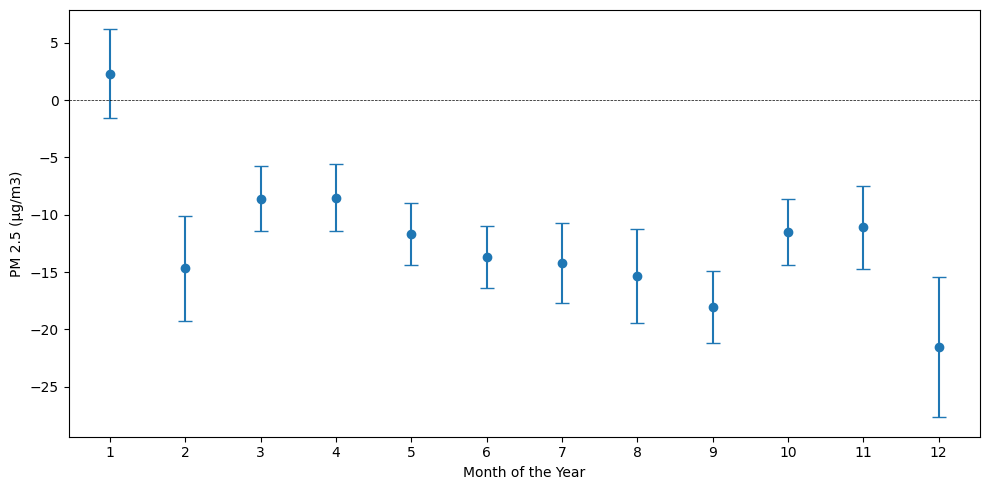

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_threshold.png'

In [1]:
# Results- Graph 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_threshold.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')

plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('PM 2.5 (μg/m3)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_threshold.png'
plt.savefig(plt_path)
plt.show()

plt_path


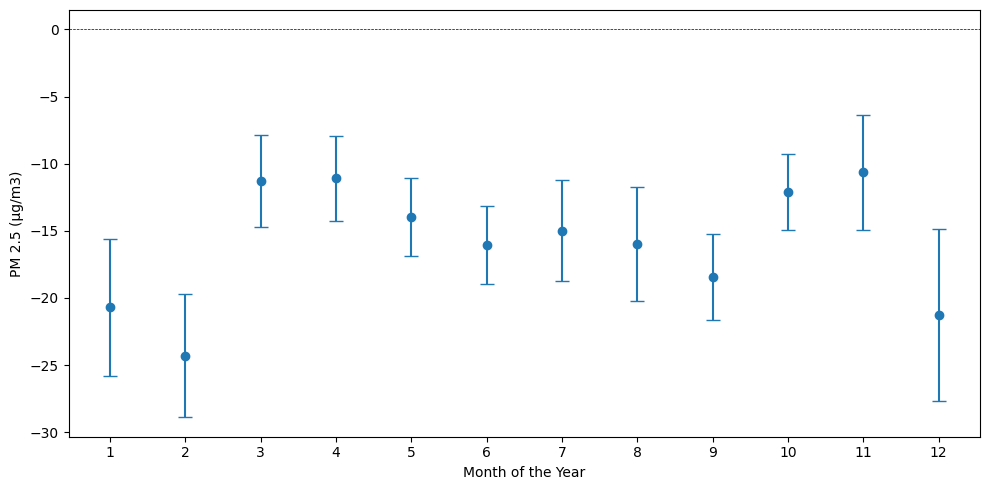

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_DIDmain.png'

In [2]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_main.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('PM 2.5 (μg/m3)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_DIDmain.png'
plt.savefig(plt_path)
plt.show()

plt_path


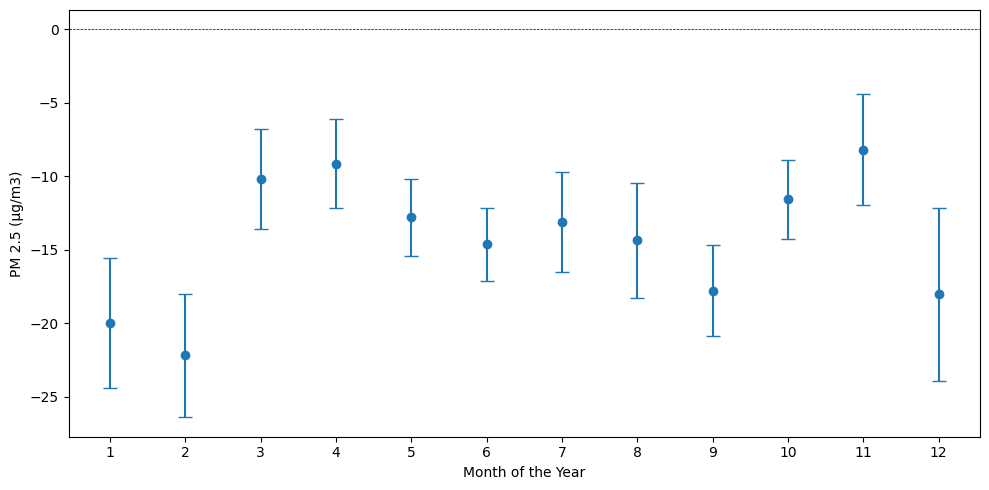

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_DIDnosim.png'

In [3]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/monthly_nosimulated.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('PM 2.5 (μg/m3)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/monthly_DIDnosim.png'
plt.savefig(plt_path)
plt.show()

plt_path

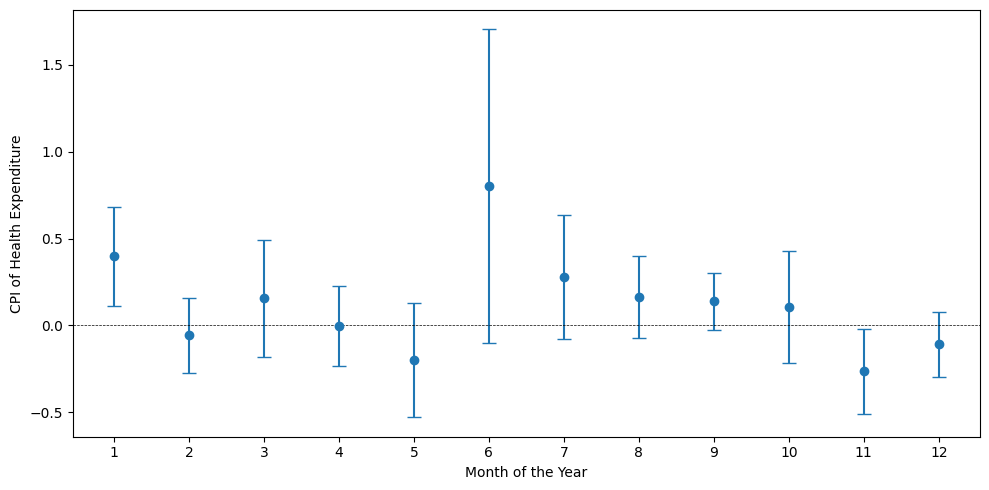

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/CPI_m.png'

In [4]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/CPI_m.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('CPI of Health Expenditure')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/CPI_m.png'
plt.savefig(plt_path)
plt.show()

plt_path

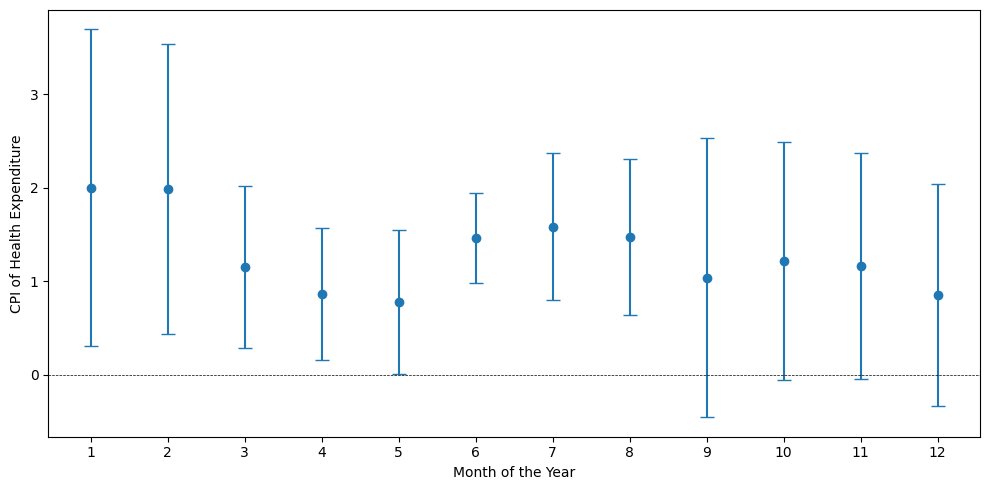

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/CPI_y.png'

In [5]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/CPI_y.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('CPI of Health Expenditure')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/CPI_y.png'
plt.savefig(plt_path)
plt.show()

plt_path

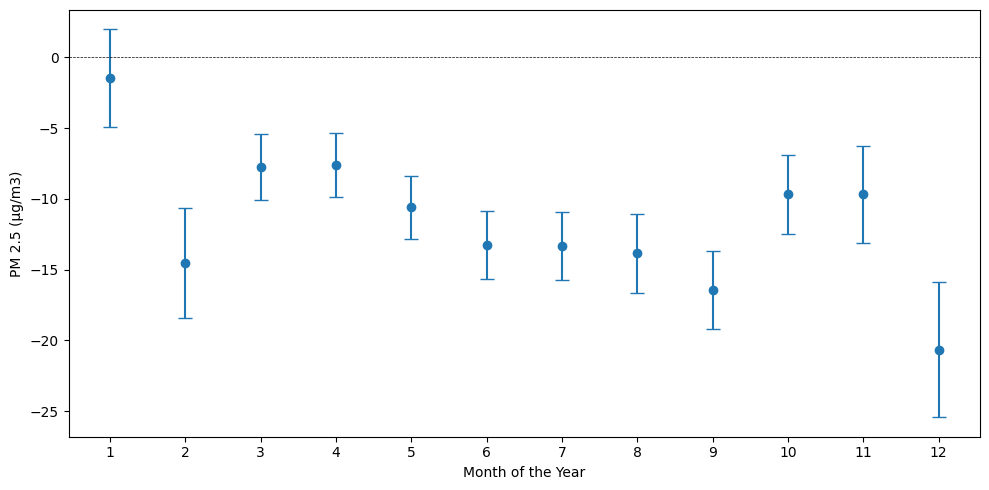

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/spill_main_sum.png'

In [7]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results_15_spill/monthly_main_15.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('PM 2.5 (μg/m3)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/spill_main_sum.png'
plt.savefig(plt_path)
plt.show()

plt_path

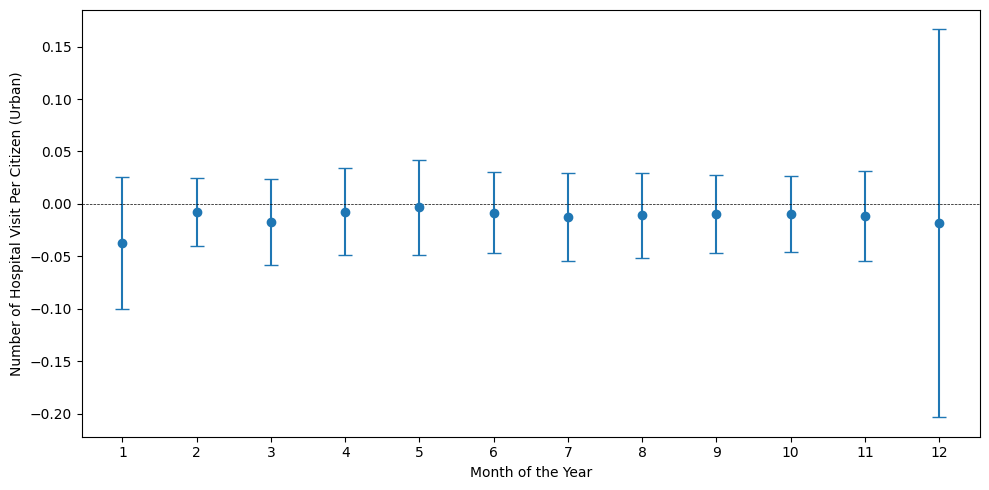

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/hospital.png'

In [8]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/Hospital_visit.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('Number of Hospital Visit Per Citizen (Urban)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/hospital.png'
plt.savefig(plt_path)
plt.show()

plt_path

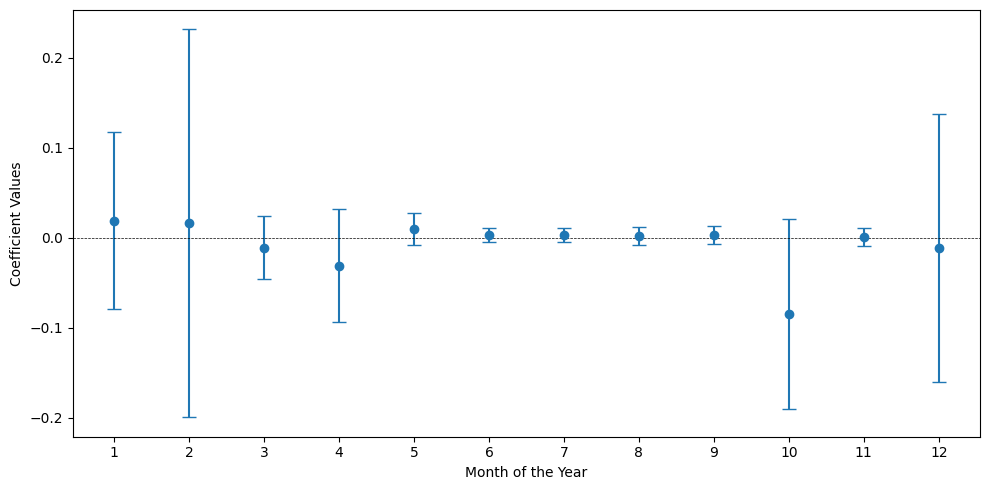

'/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/rural.png'

In [9]:
csv_path = '/Users/zhaomengshan/Desktop/Air_pollution/Results/Rural_visit.csv'
results_df = pd.read_csv(csv_path)

# Calculate the 95% confidence interval for the coefficient
critical_value = 1.96
results_df['CI_lower'] = results_df['Coefficient'] - critical_value * results_df['Std_Error']
results_df['CI_upper'] = results_df['Coefficient'] + critical_value * results_df['Std_Error']


# Plotting
plt.figure(figsize=(10, 5))
plt.errorbar(results_df['Month'], results_df['Coefficient'],yerr=results_df['Std_Error']*critical_value, fmt='o', capsize=5)

# Fit a linear trend line to the coefficient values
#z = np.polyfit(results_df['Month'], results_df['Coefficient'], 1)
#p = np.poly1d(z)
#plt.plot(results_df['Month'], p(results_df['Month']), "r--", lw=1, color='grey', linestyle='dashed')


plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.xticks(ticks=np.arange(1, 13), labels=[str(m) for m in np.arange(1, 13)])
plt.xlabel('Month of the Year')
plt.ylabel('Number of Hospital Visit Per Citizen (Urban)')
plt.tight_layout()

# Save the plot as a PNG file
plt_path = '/Users/zhaomengshan/Desktop/Air_pollution/Figure_result/rural.png'
plt.savefig(plt_path)
plt.show()

plt_path